## 1. Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam..

### Temos várias features em nosso banco de dados e podemos fazer várias combinações entre elas para investigar informações que poderiam ser relevantes, e o aconselhável seria fazer isto em um cenário real já que devemos utilizar os dados como uma fonte de luz para obter insights sem usar nossos julgamentos sobre o que é mais ou menos importante na hora de visualizar os dados. Mas como não é possível fazer todas as visualizações possíveis neste caso por uma questão de tempo e como é solicitado vou me atentar as estatísticas das quais eu julguei serem mais importantes.

In [2]:
# importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_train = pd.read_excel("cars_train.xlsx")

In [4]:
df_train.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,7473259008373930
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8196533263377470
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16282481447192


#### Vamos verificar os tipos de dados que estamos usando.

In [5]:
df_train.info(verbose = True,max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

#### Vamos verificar a quantidade de valores nulos no dataframe

In [6]:
df_train.isna().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

### Qual categoria de carro é mais frequente?

Como eu disse é possível ter várias combinações de features nos dados, por isto vou selecionar algumas features e criar uma terceira variável categórica que classifica a observação de acordo com essa combinação de features 

features consideradas: 
 - marca
 - tipo
 - modelo
 - cambio
 - ano de fabricação
 - número de portas
 - cor
 - hodometro

In [7]:
# Create a new variable by combining Feature1 and Feature2
df_train['categoria'] = df_train['marca'].astype(str)+df_train['tipo'].astype(str) +\
df_train['modelo'].astype(str) + df_train['cambio'].astype(str)  + \
df_train['ano_de_fabricacao'].astype(str) +df_train['num_portas'].astype(str) + \
df_train['cor'].astype(str)

print(df_train['categoria'])


0                            NISSANSedãKICKSCVT20174Branco
1                     JEEPSedãCOMPASSAutomática20174Branco
2                       KIASedãSORENTOAutomática20184Preto
3              VOLKSWAGENPicapeAMAROKAutomática20134Branco
4        SSANGYONGUtilitário esportivoKORANDOAutomática...
                               ...                        
29579               TOYOTAPicapeHILUXAutomática20214Branco
29580            VOLKSWAGENPicapePOLOAutomática20204Branco
29581                TOYOTAPicapeHILUXAutomática20194Cinza
29582                 PEUGEOTSedã2008Automática20214Branco
29583      AUDIUtilitário esportivoQ7Automática20164Branco
Name: categoria, Length: 29584, dtype: object


In [8]:
categoria_freq = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
soma_count = sum(categoria_freq['counts']) 
categoria_freq['Porcentagem'] = [(i/soma_count)*100 for i in categoria_freq['counts']]

In [9]:
categoria_freq.shape

(6174, 3)

Agora vamos observar quais são as categorias de veículos mais frequentes no banco de dados

In [10]:
fig = px.bar(categoria_freq, x="categoria", y="counts", color="counts", title="Gráfico de barras das duzentas categoria mais frequentes")
fig.update_xaxes(showticklabels=False)
fig.show()

Esse gráfico acima é um gráfico interativo, clique com o botão direito do mouse deixe apertado para dar zoom.

Podemos observar que a categoria de veículos mais vendidos segue um lei de potência, com poucas categorias mais frequentes e uma queda exponencial em relação a frequencia das outras categorias.

In [11]:
categoria_freq.head(30)

,categoria,counts,Porcentagem
0,PEUGEOTSedã2008Automática20214Branco,367,1.240535
1,PEUGEOTSedã2008Automática20204Branco,314,1.061385
2,JEEPSedãCOMPASSAutomática20194Branco,260,0.878853
3,FIATPicapeTOROAutomática20204Branco,217,0.733505
4,JEEPSedãCOMPASSAutomática20174Branco,216,0.730124
5,JEEPSedãCOMPASSAutomática20184Branco,211,0.713223
6,JEEPSedãCOMPASSAutomática20204Branco,188,0.635479
7,AUDISedãQ3Automática20174Branco,175,0.591536
8,PEUGEOTSedã2008Automática20194Branco,175,0.591536
9,VOLKSWAGENHatchbackPOLOAutomática20194Branco,151,0.510411


Acima temos as 30 categorias de veículos mais frequentes no banco de dados, os mais frequentes são :
 - Sedã automático da Peuget de 2014 e 2021 com 4 poretas e branco.
 - Sedã automático da Jeep de 2019 4 portas branco.
 - Picape Toro automático da Fiate de 2020 4 portas branco \
Entre outras categorias que podemos observar na tabela.

#### Hodômetro

Abaixo temos um boxplot junto com um violin plot do hodometro.

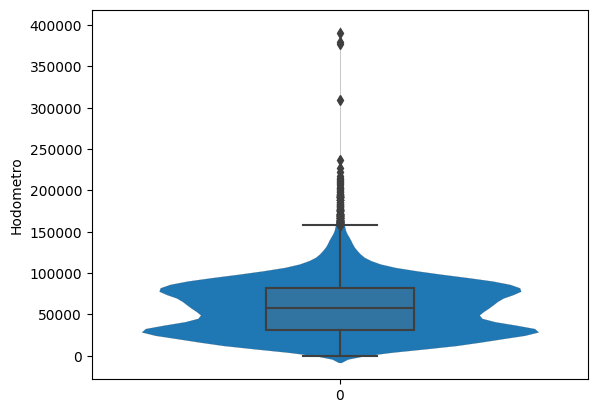

In [12]:
#plt.figure(figsize=(12,4))
ax = sns.violinplot(data = df_train['hodometro'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['hodometro'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Hodometro')
plt.show()

Podemos observar a distribuição dos dados pelo violin plot, de baixo pra cima observando no box plot temos um primeiro traço que representa o ponto em que começamos a ter dados, a extremidade inferior da caixa representa o primeiro quartil(que é equivalente ao percentil 25% dos dados, ou seja onde 25% dos dados estão), a linha dentro da caixa representa o segundo quartil(percentil 50% que é igual a mediana, que é igual a obervação que está no meio da distribuição dos dados), a extremidade superior da caixa representa o terceiro quartil(o percentil 75% dos dados) e a ultima linha na horizontal que é ortogonal a extremidade superior da caixa que representa o terceiro quartil representa o final dos dados onde paramos de ter dados. Os pontos após o final dos dados são os outliers, observações que se diferenciam muito da distribuição dos dados e que são obtidas com vários métodos diferentes no caso o seaborn se utiliza do método da amplitude interquartil onde ele considera observações que distam 1.5*(Q3-Q1) onde o Q3 é o terceiro quartil e o Q1 é o primeiro quartil.

Podemos observar que a distribuição do hodômetro é um pouco assimétrica e que possui dois picos de observações mais frequentes.

#### Quantidade de marcas únicas 

In [13]:
print("Quantidade de marcas únicas de carros", len(df_train.marca.unique()))

Quantidade de marcas únicas de carros 40


#### Frequencia das marcas no Banco de dados

In [14]:
# Vamos verificar a frequencia que cada marca aparece no banco de dados
frequencia_marca = pd.DataFrame(df_train.marca.value_counts())
soma = sum(frequencia_marca['count'])
frequencia_marca['porcentagem']=[(i/soma)*100 for i in frequencia_marca['count']]
frequencia_marca

,count,porcentagem
marca,,
VOLKSWAGEN,4594,15.528664
CHEVROLET,3020,10.208221
TOYOTA,2180,7.368848
HYUNDAI,2043,6.905760
JEEP,2000,6.760411
FIAT,1918,6.483234
BMW,1784,6.030287
AUDI,1698,5.739589
PEUGEOT,1675,5.661844


Podemos notar que as 5 marcas mais frequentes do banco de dados são VOLKSWAGEN, CHEVROLET, TOYOTA, HYUNDAI, JEEP

#### Quantidade de modelos de carros

In [15]:
print('Quantidade de modelos únicos de carros:',len(df_train.modelo.unique()))

Quantidade de modelos únicos de carros: 457


#### Quantidade de versões únicas de carros no banco de dados

In [16]:
print('Quantidade de versões únicas de carros:',len(df_train.versao.unique()))

Quantidade de versões únicas de carros: 1916


#### Número de fotos do veículo anunciado

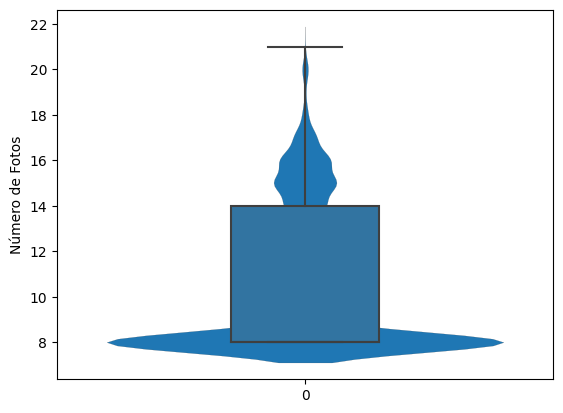

In [25]:
ax = sns.violinplot(data = df_train['num_fotos'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['num_fotos'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Número de Fotos')
plt.show()

Temos uma distribuição do número de fotos assimétrica, com a maior parte dos dados tendo entre zero e um pouco mais do que 8 fotos.

#### Ano de Fabricação

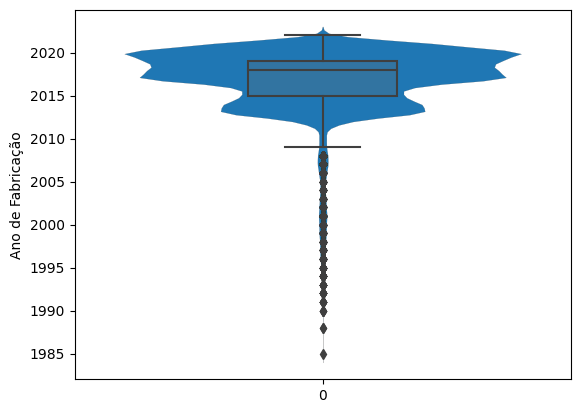

In [18]:
ax = sns.violinplot(data = df_train['ano_de_fabricacao'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['ano_de_fabricacao'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Ano de Fabricação')
plt.show()

Temos uma distribuição assimétrica do ano de fabricação também, com a maior parte dos anos de fabricação estando entre 2015 e 2020, e uma parcela considerável entre 2010 e 2015.

#### Ano do modelo

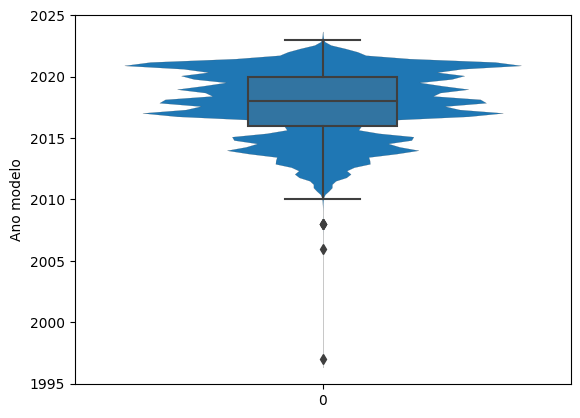

In [19]:
#### Ano de Fabricação
ax = sns.violinplot(data = df_train['ano_modelo'], inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=df_train['ano_modelo'], width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Ano modelo')
plt.xlabel("")
plt.show()

Aqui temos uma distribuição muito similar ao ano de fabricação, com a maior parte dos carros estando entre 2015 e 2020 e uma parcela considerável entre 2010 e 2015.

#### Estados mais frequentes no banco de dados

In [20]:
frequencia_estado = pd.DataFrame(df_train.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),16378,55.361006
Rio de Janeiro (RJ),2548,8.612764
Paraná (PR),2526,8.538399
Santa Catarina (SC),2302,7.781233
Minas Gerais (MG),1775,5.999865
Rio Grande do Sul (RS),1646,5.563818
Goiás (GO),789,2.666982
Bahia (BA),604,2.041644
Pernambuco (PE),318,1.074905


Mais da metade do Banco de dados se passa só no estado de São Paulo.

#### Os veículos já foram trocados antes?

In [21]:
frequencia_troca = pd.DataFrame(df_train.troca.value_counts())
soma = sum(frequencia_troca['count'])
frequencia_troca['porcentagem']=[(i/soma)*100 for i in frequencia_troca['count']]
frequencia_troca

,count,porcentagem
troca,,
False,24523,82.89278
True,5061,17.10722


Cerca de 82% dos veículos não foram trocados

#### Os veículos tiveram um único dono?

In [22]:
df_train.veiculo_único_dono.value_counts()

veiculo_único_dono
Único dono    10423
Name: count, dtype: int64

Aproximadamente 35,23% dos veículos tiveram apenas um único modelo.

Vamos fazer a suposição que os dados faltantes indicam que teve mais de um dono já que é uma variável dicotômica.